In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
import statsmodels.api as sm
import scipy.stats as sst


stud = pd.read_csv('stud_math.csv')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Итак, у нас 30 колонок, из которых 3 числовые: age, score, absences. Остальные, согласно описанию из задания - категориальные. Целевая переменная - score баллы по госэкзамену по математике

In [150]:
stud.isnull().sum() # посмотрим, в каких колонках пустые значения

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Во всех колонках, за исключением трех имеются пустые значения.

In [151]:
print(f'В датасете {stud.isnull().any().sum()} столбцов с пустыми значениями')

В датасете 27 столбцов с пустыми значениями


In [152]:
'''Прежде чем приступить к заполнению пустых значений, нужно, 
во-первых, понять, что кроме пустых, в столбцах не содержится других недопустимых значений,
во-вторых, понять, чем, собственно заполнять.'''

'''создадим допустимые диапазоны значений для колонок'''

stud_ranges = {
    stud.columns[1] : ['F','M'],
    stud.columns[2] : range(15,23),
    stud.columns[3] : ['U','R'],
    stud.columns[4] : ['LE3','GT3'],
    stud.columns[5] : ['T','A'],
    stud.columns[6] : range(0,5),
    stud.columns[7] : range(0,5),
    stud.columns[8] : ['teacher','health','services','at_home','other'],
    stud.columns[9] : ['teacher','health','services','at_home','other'],
    stud.columns[10] : ['home','reputation','course','other'],
    stud.columns[11] : ['mother','father','other'],
    stud.columns[12] : range(1,5),
    stud.columns[13] : range(1,5),
    stud.columns[14] : range(0,4),
    stud.columns[15] : ['yes','no'],
    stud.columns[16] : ['yes','no'],
    stud.columns[17] : ['yes','no'],
    stud.columns[18] : ['yes','no'],
    stud.columns[19] : ['yes','no'],
    stud.columns[20] : ['yes','no'],
    stud.columns[21] : ['yes','no'],
    stud.columns[22] : ['yes','no'],
    stud.columns[23] : ['yes','no'],
    stud.columns[24] : range(1,6),
    stud.columns[25] : range(1,6),
    stud.columns[26] : range(1,6),
    stud.columns[27] : range(1,6)
}

In [153]:
def col_isinrange(df, col, rang):   # функция, для определения значений столбца col датасета df, 
                                    # выпадающих за рамки допустимых диапозонов range
    err_val = [(x, len(df.loc[~df[col].apply(lambda x: (x in rang) or pd.isnull(x) ), col])) # список пар из некор. значений и их количества 
                for x in df.loc[~df[col].apply(lambda x: (x in rang) or pd.isnull(x) ), col].unique()]
    return err_val

In [154]:
'''Теперь с помощью функции col_isinrange() протестируем датасет stud'''

err_val_dict ={}

for i in stud.columns[1:-2]:
    err_val_i = col_isinrange(stud, i, stud_ranges[i])
 
    if len(err_val_i) == 0:
        continue
    else:
        err_val_dict[i] = err_val_i

print('Столбцы с некорректными данными: \n', err_val_dict)


Столбцы с некорректными данными: 
 {'Fedu': [(40.0, 1)], 'studytime, granular': [(-6.0, 388), (-9.0, 388), (-3.0, 388), (-12.0, 388)], 'famrel': [(-1.0, 1)]}


In [155]:
'''Таким образом, мы выяснили, что 3 столбца датасета, содержат подозрительные значения. 
Обратим внимание на столбец studytime, granular.
Изначально я решила, что в описании (или в датасете) есть неточность в названии тсолбца.
Однако, вот значения studytime, granular'''
stud['studytime, granular'].value_counts(dropna  = False)

-6.0     194
-3.0     103
-9.0      64
-12.0     27
 NaN       7
Name: studytime, granular, dtype: int64

In [156]:
'''Таким образом, можно сделать вывод, что колонка studytime, granular попала  вдатасет по ошибке, удалим ее'''
stud.drop(['studytime, granular'], inplace = True, axis = 1)


In [157]:
'''Заменим некорректные значения в столбцах Fedu и famrel.
Значение Fedu = 40 будем считать опечаткой и заменим на 4.
Значение famrel заменим на минимальное, то есть 0'''

stud.at[stud[stud.Fedu == 40].index[0],'Fedu'] = 4
stud.at[stud[stud.famrel == -1].index[0],'famrel'] = 0

In [158]:
stud.info() # проверим, что столбец удален

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Определим функции:

In [159]:
def df_filt(df, col, value): # функция, которая фильтрует df по критерию: столбец col = crit, возвращает DataFrame
    return df[df[col] == value]


def show_plots(df, col_num='score', size = 5):
    '''
      функция, которая рисует графики qq-plot, hist и boxplot для столбца col_num датасета df.
      Необязательные аргументы: 
       col_num - столбец, распределение которого нужно проверить
       size - размер рисунка                
    '''
    f = plt.figure()
    f.clear()
    plt.close(f)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (3*size,size))

    fig = sm.qqplot(df.dropna(subset = [col_num])[col_num], fit = True, line ='45', ax=ax1)
    fig.suptitle('QQ-plot, histogram and boxplot for {0} '.format(col_num))
        
    ax2.hist(df.dropna(subset = [col_num])[col_num], histtype = 'bar', align = 'mid', rwidth = 0.8, color = 'green')
    ax3.boxplot(df.dropna(subset = [col_num])[col_num], vert = False)  
     
    plt.show


def score_filtered_isnorm(df, col, value, a = 0.05):  # возвращает truth если выборка нормальна
    if len(df_filt(df,col,value).score) >= 20:  # проверка объема выборки на применимость метода normaltest
        st, p = sst.normaltest(df_filt(df,col,value).score)
        result = p > a
    elif len(df_filt(df,col,value).score) >= 3: # в противном случае применяем тест Шапиро-Уилка, если n >= 3
        st, p = sst.shapiro(df_filt(df,col,value).score)
        result = p > a
    else:
        result = False
    return result


def n_isbig(df, col, value, n = 4): # функция определения, достаточен ли объем выборки из df, отфильтрованный по col = value
    return len(df_filt(df,col,value)) > n


def unfit_criterias(df, n = 4):  # функция проверки категориальных признаков на 
                                 # пригодность для оценки по критерию Стьюдента
                                 # возвращает словарь вида 
                                 #   {
                                 #    col : массив [     value, 
                                 #                       нормальна ли выборка (True/False), 
                                 #                       достаточный ли объем выборки(True/False), 
                                 #                       объем выборки
                                 #                     ]
                                 #   } для тех col и value, что для df[col == value].score - не выполняется критерий
    unfit = {}
    for i in df.drop(['age', 'score', 'absences'], axis = 1).columns:
        jarr = np.empty(shape=[0, 4])
        for j in df[i].unique():
            if score_filtered_isnorm(df,i,j) and n_isbig(df,i,j,n):
                continue
            else:
                jarr = np.append(jarr, [[j, score_filtered_isnorm(df,i,j),n_isbig(df,i,j,n), len(df_filt(df, i, j))]], axis=0)
                unfit[i] = jarr
    return unfit



Проверим целевую переменную на нормальность.

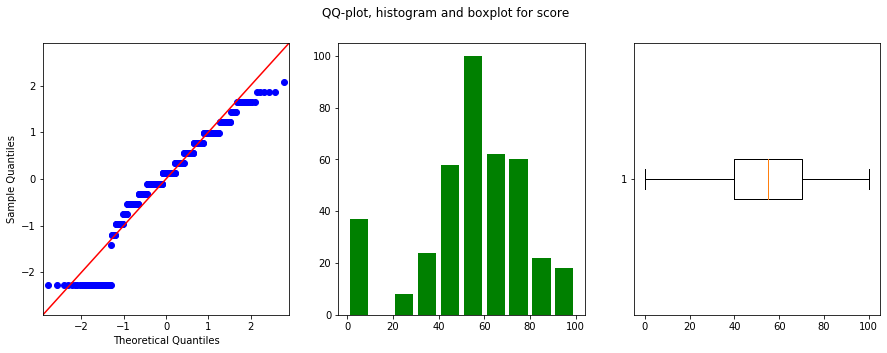

In [160]:
show_plots(stud)

Мы видим, что столбец вцелом распределен приблизительно нормально. Однако значение score = 0 несколько "портит" выборку.
Проверим score с помощью функции normaltest с нулями и без них:

In [161]:
print('pvalue с нулями: {0}\npvalue без нулей: {1}' \
      .format(sst.normaltest(stud[stud.score >=0].score).pvalue, sst.normaltest(stud[stud.score > 0].score).pvalue))

pvalue с нулями: 1.208644222895489e-07
pvalue без нулей: 0.051812401238085656


Чтобы свести распределение score к приблизительно нормальному, разделим датасет на два по условию score > 0.
Вполне логичным представляется, что 0 баллов получили те студенты, которые не пришли на экзамен или не сдали работы. 
В дальнейшем можно создать и изучить поведение нового категорийного признака: пришел студент на экзамен или нет (yes/no).
Очевидно, для определения влияния на этот новый признак других столбцов, нужно применять гипотезу о распределение разности пропорций.


In [162]:
print('В score {} пустых значений, их можно заполнить или исключить.\nПроверим, повлияет ли это на нормальность.'.format(stud.isnull().sum()['score']))

В score 6 пустых значений, их можно заполнить или исключить.
Проверим, повлияет ли это на нормальность.


In [163]:
print('Медиана: {1}\nСр. значение: {0}\n'.format(stud.score.mean(),stud.score.median()))

Медиана: 55.0
Ср. значение: 52.26221079691517



Выбросов нет, в качестве среднего можно взять и медиану, и среднее значение. Заполним пропуски в score медианным значением.

In [164]:
median = stud.score.median()
stud_tmp = stud.copy()
stud_tmp['score'] = stud_tmp.score.apply(lambda x: median if pd.isnull(x) else x)
print('pvalue NaN удалены: {0}\npvalue NaN заменены: {1}' \
      .format(sst.normaltest(stud[stud.score > 0].score).pvalue, sst.normaltest(stud_tmp[stud_tmp.score > 0].score).pvalue))

pvalue NaN удалены: 0.051812401238085656
pvalue NaN заменены: 0.07151193218241954


Мы видим, что замена пустых значений вместо их исключения сделала датасет "еще более" нормальным. 
Будем далее работать с датасетом с заполненными пустыми значениями в score

In [165]:
nstud = stud_tmp[stud_tmp.score > 0].copy() # nstud датасет с приблизительно нормальным score

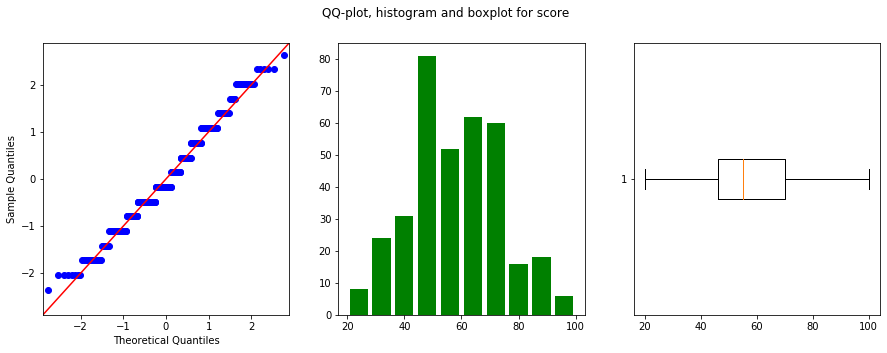

In [166]:
show_plots(nstud)

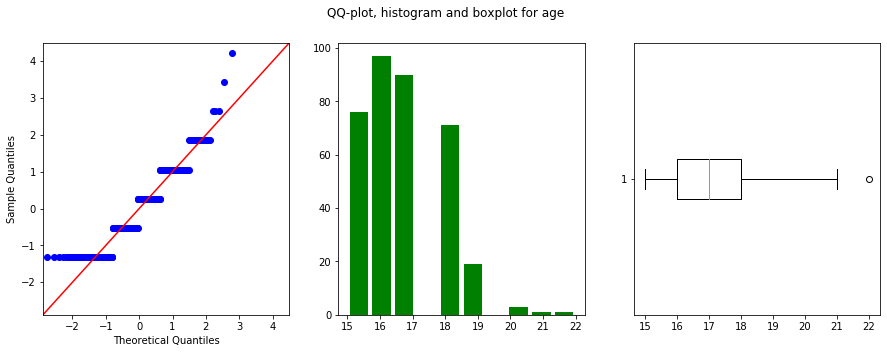

In [167]:
'''Посмотрим на столбец age'''
show_plots(nstud, 'age')

In [168]:
print('pvalue = ', sst.normaltest(nstud.age).pvalue)

pvalue =  0.0002544860961009096


Не смотря на то, что pvalue получился меньше 0.05, генеральная совокупность "возраст студентов", 
очевидно, распределена приблизительно нормально.

Посмотрим на корреляцию между score и age.

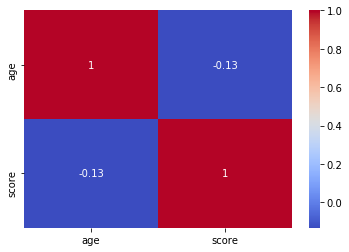

In [169]:
sns.heatmap(nstud.loc[:,['age','score']].corr(),annot = True, cmap = 'coolwarm')

Наблюдается, незначительная отрицательная корреляция между возрастом и баллами. 
Можно предположить, что чем старше студент, тем сложнее задания. 
Либо же чем старше студент, тем больше вероятность наличия романтических отношений, 
что также может влиять на оценку.

Рассмотрим столбец absences.

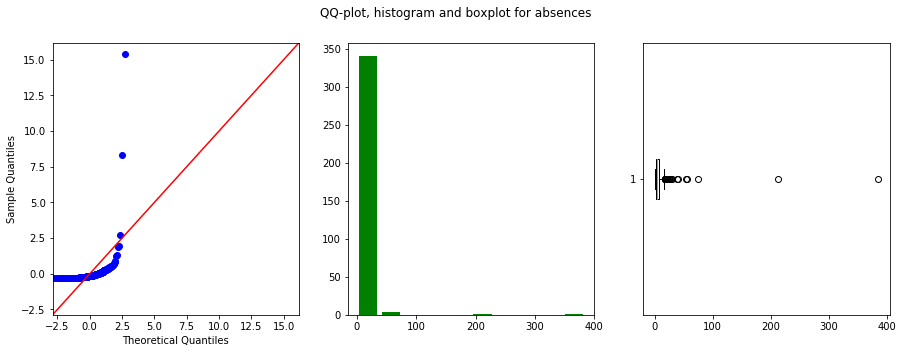

In [170]:
show_plots(nstud, 'absences')

Столбец absences очень "испорчен" выбросами. Рассмотрим их.

In [171]:
q1 = nstud.absences.quantile(0.25) # первый квантиль
q2 = nstud.absences.quantile(0.5)  # медиана
q3 = nstud.absences.quantile(0.75) # третий квантиль
IQR = q3 - q1

'''посчитаем, сколько значений правее q3 + 1.5*IQR'''
print('Границы выбросов: [{l}, {r}] \n'.format(l=0, r=q3 + 1.5*IQR))
print('Количество значений датасета, правее верхней границы: ', len(nstud[nstud.absences > (q3 + 1.5*IQR)]))

Границы выбросов: [0, 17.0] 

Количество значений датасета, правее верхней границы:  27


Удалить или заменить такое количество выборки без искажений нельзя. Посмотрим, ниже какого значения количество пропусков у 95% студентов

In [172]:
np.sort(nstud.absences.unique()) # все значения пропусков

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  28.,  30.,  38.,  40.,  54.,  56.,
        75., 212., 385.,  nan])

In [173]:
q95 = nstud['absences'].quantile(0.95)
print('У 95% студентов пропусков меньше, чем {0} \n'.format(round(q95)))
print('У {0} студентов пропусков больше этого значения'.format(len(nstud[nstud.absences > q95])))


У 95% студентов пропусков меньше, чем 20.0 

У 17 студентов пропусков больше этого значения


Заменим данные: большие, чем квантиль 95% и пустые на медиану.

In [174]:
median = nstud[nstud.absences < q95]['absences'].median()
print('Медиана absences :', median)

Медиана absences : 4.0


In [175]:
nstud['absences'] = nstud.absences.apply(lambda x: median if (pd.isnull(x) | (x > q95)) else x)

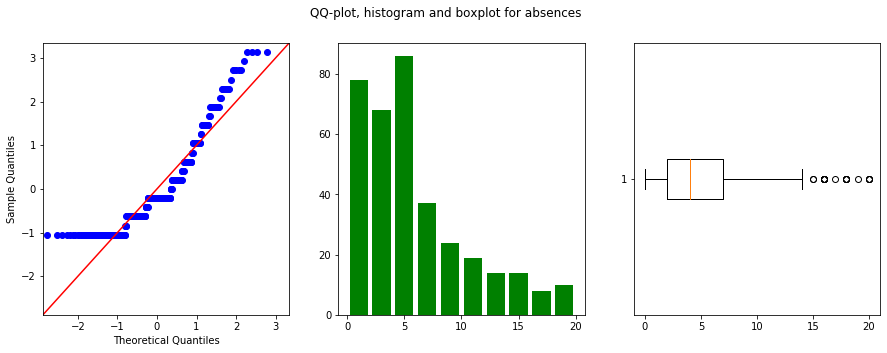

In [176]:
show_plots(nstud, 'absences')

In [177]:
print('pvalue = ', sst.normaltest(nstud.absences).pvalue)

pvalue =  2.7250288900795774e-14


Можно предположить, что выборка относительно absences не совсем качественная, поэтому, хоть генеральная совокупность приблизительно нормальная, 
тем не менее pvalue < 0.05

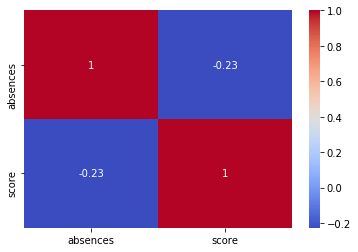

In [178]:
sns.heatmap(nstud.loc[:,['absences','score']].corr(),annot = True, cmap = 'coolwarm')

Наблюдается отрицательная корреляция между score и absences: чем больше пропусков тем ниже балл на экзамене.

Посмотирм на корреляцию между тремя числовыми столбцами (age, score, absences)

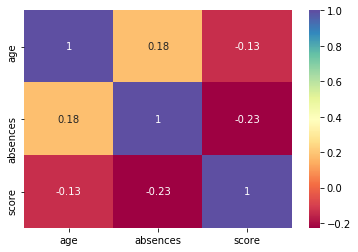

In [179]:
sns.heatmap(nstud.loc[:,['age','absences','score']].corr(),annot = True, cmap = 'Spectral')

Наблюдается отрицательная корреляция между возрастом и баллами. Можно предположить, что чем старше студент, тем сложнее задания. Либо же чем старше студент, тем больше вероятность наличия романтических отношений, что также может влиять на оценку.

Наблюдается отрицательная корреляция между score и absences: чем больше пропусков тем ниже балл на экзамене.

Наблюдается положительная корреляция между age и absences. Можно предположить, что чем старше студент, то тем больше пропусков (например, из-за романтических отношений).

Проанализируем пару признаков: address и traveltime. Сравним значения address и traveltime, чтобы попытаться заполнить пустые значения.

Можно предположить, что время до школы зависит от адреса, поэтому пропуски в этих колонках можно взаимным образом дополнить.


In [180]:
print('Для address = R значения traveltime\n{0}\nДля address = U значения traveltime\n{1}'.
    format(nstud.loc[nstud.address =='R','traveltime'].value_counts(),nstud.loc[nstud.address =='U','traveltime'].value_counts())
)

Для address = R значения traveltime
1.0    32
2.0    22
3.0    10
4.0     4
Name: traveltime, dtype: int64
Для address = U значения traveltime
1.0    183
2.0     61
3.0      7
4.0      3
Name: traveltime, dtype: int64


Заменим пустые значения address на U, если соответствующие значения traveltime = 1 и 2 и на R для traveltime = 3 и 4.

In [181]:
s = nstud[(nstud.traveltime.apply(lambda x : x in (1,2))) & (nstud.address.apply(lambda x : pd.isnull(x)))]['address']
for i in s.index:
    nstud.at[i,'address'] = 'U'

In [182]:
s = nstud[(nstud.traveltime.apply(lambda x : x in (3,4))) & (nstud.address.apply(lambda x : pd.isnull(x)))]['address']
for i in s.index:
    nstud.at[i,'address'] = 'R'

In [183]:
'''Заменим пустые значения traveltime на 1.0, как самое частое значение'''
nstud['traveltime'] = nstud.traveltime.apply(lambda x : 1.0 if pd.isnull(x) else x)

'''Заменим пустые значения address на U, как самое частое значение'''
nstud['address'] = nstud.address.apply(lambda x : 'U' if pd.isnull(x) else x)

Займемся остальными категориальными признаками.

In [184]:
'''Определим функцию заполнения пустых значений
    df - датасет, col - столбец, agg - среднее значение, 
    может принимать значение mode для кат. признака, median или mean для числового
    is_cat - True, если кат. признак и False, если числовой'''

'''Определим функцию заполнения пустых значений'''

def fill_navalues(df, col, agg = 'mode', is_cat = True):    
    
    if is_cat:
        agg_value = df[col].agg(agg)[0]
        df[col] = df[col].fillna(agg_value) 
    
    else:
        try:
            is_number = float(df[col][1])
        except:
            print('Колонка {0} не числовая. Для is_cat = {1} используйте только числовые колонки'.format(col,is_cat))
        else:
            agg_value = df[col].agg(agg)
            df[col] = df[col].fillna(agg_value)  


In [185]:
'''заменим пустые значений'''

for i in nstud.drop(['age', 'score', 'absences','address','traveltime'],  axis = 1):
    fill_navalues(nstud,i)

Проверим на NaN после всех манипуляций

In [186]:
nstud.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

Очистка и подготовка данных выполнена. Можно приступить к развед. анализу.

Применим функцию unfit_criterias, определенную ранее, для того, чтобы понять, какие признаки не распределены нормально, чтобы исключить их из оценки по Стьюденту.

In [194]:
unfit_criterias(nstud, 8) # 8 - минимальный объем выборки

{'Medu': array([[0., 0., 0., 3.]]),
 'Fedu': array([[0., 0., 0., 2.]]),
 'guardian': array([['other', 'False', 'True', '24']], dtype='<U32'),
 'traveltime': array([[4., 1., 0., 7.]]),
 'famrel': array([[0., 0., 0., 1.],
        [1., 1., 0., 6.]]),
 'freetime': array([[ 1.,  0.,  1., 16.]])}

Теперь, найдем все значимые критерии с помощью функции.

In [195]:
def df_getstatdif(df, a = 0.05, n = 8, ncols = ['age', 'score', 'absences']): # функция определения значимых критериев.
                                                                              # возвращает список значимых столбцов

    unfit_cr = unfit_criterias(df, n)  

    def get_stat_dif(column):    # функция определения значим ли column 
        vals = [x for x in df[column].unique() if (not x in unfit_cr[column][:,0] if column in unfit_cr.keys() else True)]
        result = ''
        if len(vals) > 1:
            combinations_all = list(combinations(vals, 2))
            for i in combinations_all:
                if ttest_ind(df_filt(df,column,i[0]).score,df_filt(df,column,i[1]).score).pvalue <= a/len(combinations_all):
                    print('Найдены статистически значимые различия для колонки', column)
                    result = column
                    break
        return result
    cols_list = []
    
    for i in df.drop(ncols, axis = 1).columns:
        if get_stat_dif(i) == '':
            continue
        else:
            cols_list.append(i)
    return cols_list


Найдем все статистически значимые критерии в датасете:

In [196]:
cols_list = df_getstatdif(nstud, 0.05, 8)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


In [197]:
print('статистически значимые критерии в датасете:\n', cols_list)

статистически значимые критерии в датасете:
 ['address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'goout']


In [198]:
def show_boxplot(column):  # функция для рисования бокплотов по критерию
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[:,[column, 'score']],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Нарисуем боксплоты для значимых критериев:

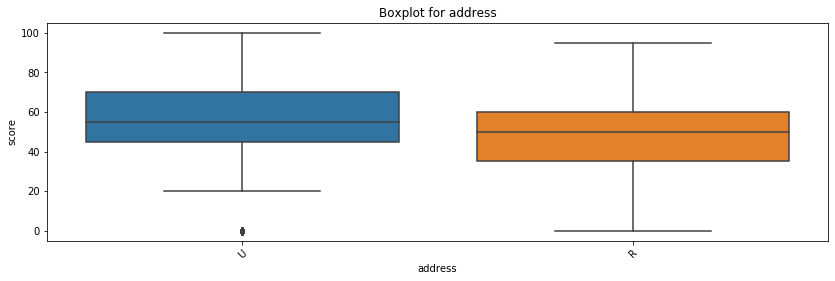

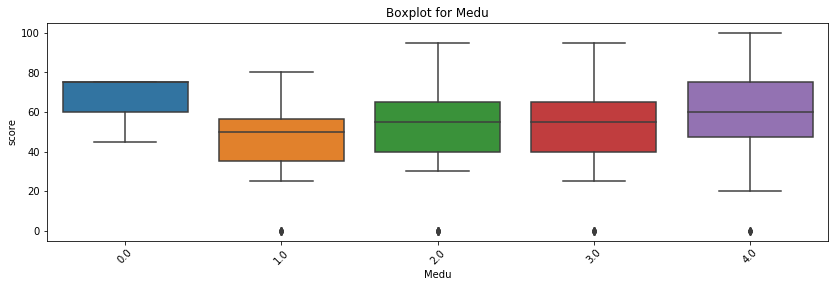

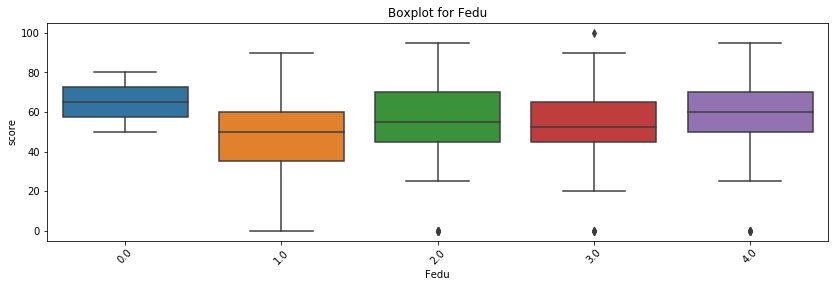

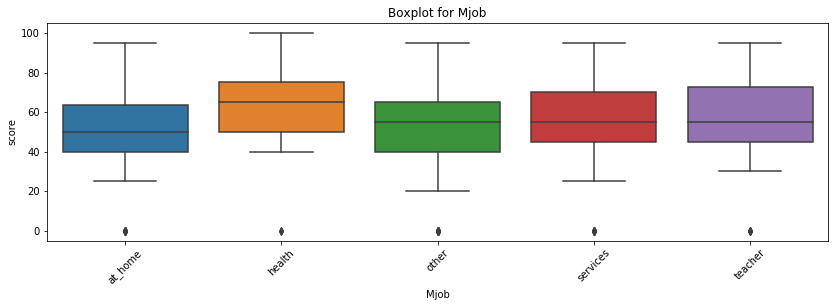

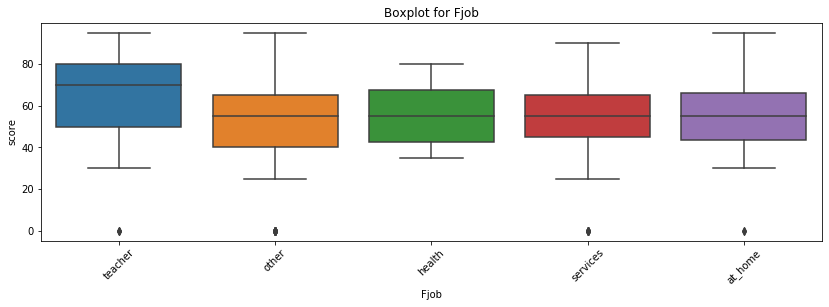

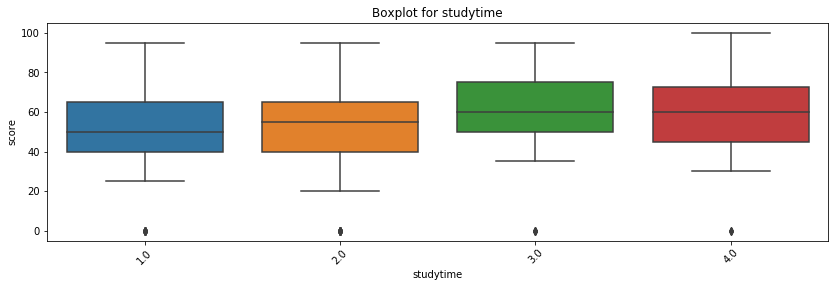

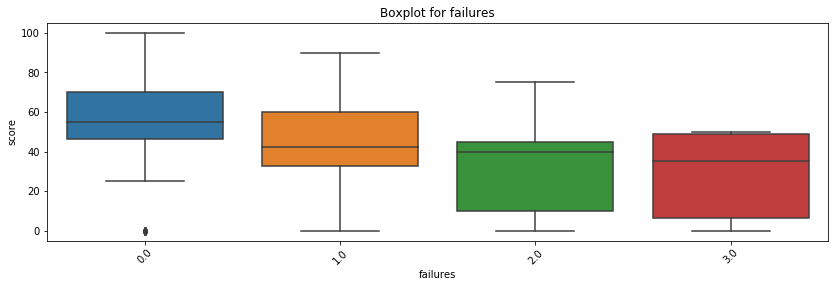

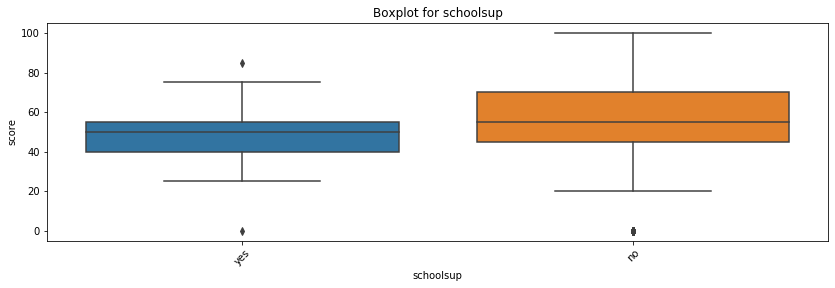

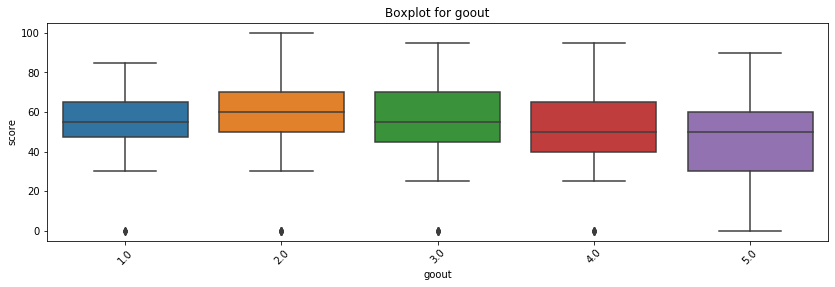

In [199]:
for i in cols_list:
    show_boxplot(i)

Как мы выяснили, категориальные переменные, которые, возможно, оказывают влияние на оценку, это: 
'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'goout'

In [200]:
stud_for_model = nstud.loc[:, ['age','score', 'absences','address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'goout']]
stud_for_model.head()

,age,score,absences,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,goout
0,18,30.0,6.0,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,4.0
1,17,30.0,4.0,U,1.0,1.0,at_home,other,2.0,0.0,no,3.0
2,15,50.0,10.0,U,1.0,1.0,at_home,other,2.0,3.0,yes,2.0
3,15,75.0,2.0,U,4.0,2.0,health,other,3.0,0.0,no,2.0
4,16,50.0,4.0,U,3.0,3.0,other,other,2.0,0.0,no,2.0


В результате анализа влияния параметров условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике получены следующие выводы:

1) В данных достаточно много пустых значений, поэтому были применены различные методы заполнения пустот. В дальнейшем можно оценить эти методы относительно работы модели, и, возможно, появятся показания к изменению способа заполнения пустот.

2) Столбец absences содержит очень много выбросов и pvalue оценки гипотезы о нормальности значительно меньше 0,005. Поэтому можно сделать вывод, что данные в данном столбце не достаточно качественные. Однако, так как наблюдается отрицательная корреляция между absences и score (и с точки здравого смысла эта корреляция вполне оправдана), то было решено столбец очистить от выбросов и оставить в выборке.

3) Самые важные категориальные параметры, кодирующие условия жизни учеников, которые предлагается использовать в дальнейшем для построения модели, это 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'goout'.